In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd

# Jika mengunggah banyak file
filenames = ['Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv','Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
             'Friday-WorkingHours-Morning.pcap_ISCX.csv']
dfs = [pd.read_csv(file) for file in filenames]

# Menggabungkan beberapa file jadi satu DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22         1266342                  41   
1                 22         1319353                  41   
2                 22             160                   1   
3                 22         1303488                  41   
4              35396              77                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       44                         2664   
1                       44                         2664   
2                        1                            0   
3                       42                         2728   
4                        2                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          6954                     456   
1                          6954                     456   
2                             0                       0   
3                          6634                 

In [ ]:
# Menampilkan ringkasan informasi DataFrame
print(combined_df.info())

# Menampilkan ringkasan statistik deskriptif
print(combined_df.describe())

# Mengecek apakah ada missing values (nilai kosong)
print(combined_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703245 entries, 0 to 703244
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             703245 non-null  int64  
 1    Flow Duration                703245 non-null  int64  
 2    Total Fwd Packets            703245 non-null  int64  
 3    Total Backward Packets       703245 non-null  int64  
 4   Total Length of Fwd Packets   703245 non-null  int64  
 5    Total Length of Bwd Packets  703245 non-null  int64  
 6    Fwd Packet Length Max        703245 non-null  int64  
 7    Fwd Packet Length Min        703245 non-null  int64  
 8    Fwd Packet Length Mean       703245 non-null  float64
 9    Fwd Packet Length Std        703245 non-null  float64
 10  Bwd Packet Length Max         703245 non-null  int64  
 11   Bwd Packet Length Min        703245 non-null  int64  
 12   Bwd Packet Length Mean       703245 non-nul

In [ ]:
# Menghapus duplikat jika ada
combined_df = combined_df.drop_duplicates()

# Mengisi atau menghapus missing values
combined_df = combined_df.dropna()  # Menghapus baris dengan nilai kosong
# Atau bisa gunakan pengisian nilai default
# combined_df.fillna(0, inplace=True)

# Menampilkan ulang info setelah pembersihan
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 615847 entries, 0 to 703244
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             615847 non-null  int64  
 1    Flow Duration                615847 non-null  int64  
 2    Total Fwd Packets            615847 non-null  int64  
 3    Total Backward Packets       615847 non-null  int64  
 4   Total Length of Fwd Packets   615847 non-null  int64  
 5    Total Length of Bwd Packets  615847 non-null  int64  
 6    Fwd Packet Length Max        615847 non-null  int64  
 7    Fwd Packet Length Min        615847 non-null  int64  
 8    Fwd Packet Length Mean       615847 non-null  float64
 9    Fwd Packet Length Std        615847 non-null  float64
 10  Bwd Packet Length Max         615847 non-null  int64  
 11   Bwd Packet Length Min        615847 non-null  int64  
 12   Bwd Packet Length Mean       615847 non-null  fl

In [ ]:
# Menampilkan semua nama kolom
print(combined_df.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

 Label
BENIGN      395059
DDoS        128016
PortScan     90819
Bot           1953
Name: count, dtype: int64


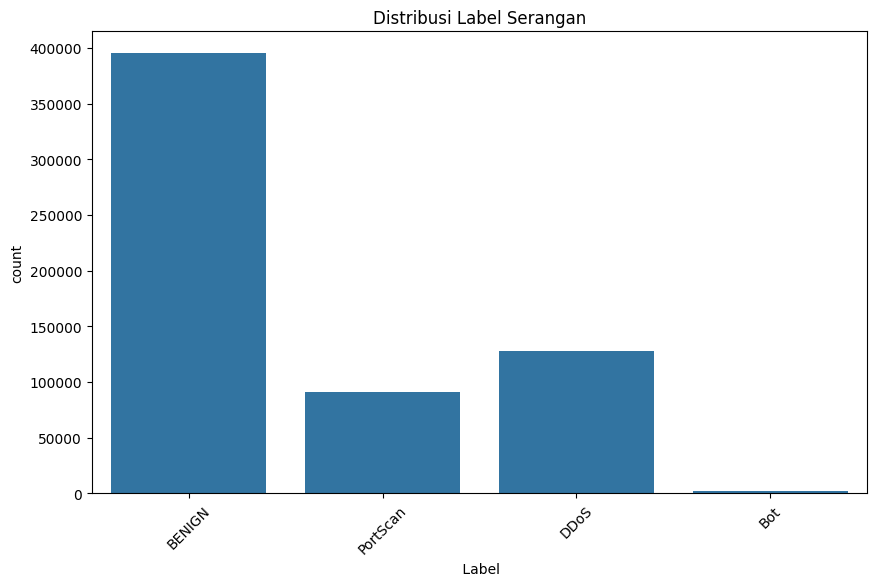

In [ ]:
# Melihat distribusi data berdasarkan label serangan
print(combined_df[' Label'].value_counts())

# Visualisasi distribusi label menggunakan matplotlib atau seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x=' Label')
plt.title("Distribusi Label Serangan")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Mengubah data kategori menjadi numerik (contoh: Label)
combined_df[' Label'] = combined_df[' Label'].astype('category').cat.codes

# Memisahkan fitur (X) dan target (y)
X = combined_df.drop(columns=[' Label'])  # Semua kolom kecuali Label
y = combined_df[' Label']

# Menampilkan contoh X dan y
print(X.head())
print(y.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22         1266342                  41   
1                 22         1319353                  41   
2                 22             160                   1   
3                 22         1303488                  41   
4              35396              77                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       44                         2664   
1                       44                         2664   
2                        1                            0   
3                       42                         2728   
4                        2                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          6954                     456   
1                          6954                     456   
2                             0                       0   
3                          6634                 

In [ ]:
# Mengecek distribusi nilai pada kolom Label
print(y.value_counts())

# Menampilkan persentase distribusi
print("\nDistribusi persentase:")
print(y.value_counts(normalize=True) * 100)


 Label
0    395059
2    128016
3     90819
1      1953
Name: count, dtype: int64

Distribusi persentase:
 Label
0    64.148888
2    20.786981
3    14.747007
1     0.317124
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")

Training data: (492677, 78)
Testing data: (123170, 78)


In [ ]:
import numpy as np

# Memeriksa nilai NaN atau Inf pada data
print(f"Apakah ada nilai NaN di X_train? {X_train.isnull().any().any()}")
print(f"Apakah ada nilai Inf di X_train? {np.isinf(X_train).any().any()}")

# Mengganti nilai NaN atau Inf dengan nilai yang sesuai (misalnya 0 atau nilai rata-rata)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)  # Ganti Inf dengan NaN
X_train.fillna(X_train.mean(), inplace=True)  # Ganti NaN dengan rata-rata kolom


Apakah ada nilai NaN di X_train? False
Apakah ada nilai Inf di X_train? True


In [ ]:
import numpy as np

# Ganti nilai Inf dengan NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Isi nilai NaN dengan rata-rata kolom
X_train.fillna(X_train.mean(), inplace=True)

# Periksa apakah masih ada nilai NaN atau Inf
print(f"Apakah ada nilai NaN di X_train setelah perbaikan? {X_train.isnull().any().any()}")
print(f"Apakah ada nilai Inf di X_train setelah perbaikan? {np.isinf(X_train).any().any()}")


Apakah ada nilai NaN di X_train setelah perbaikan? False
Apakah ada nilai Inf di X_train setelah perbaikan? False


In [ ]:
from imblearn.over_sampling import SMOTE

# Mengatasi ketidakseimbangan pada data training saja
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan bentuk data setelah resampling
print(f"Training data setelah resampling: {X_train_resampled.shape}")
print(f"Testing data: {X_test.shape}")


Training data setelah resampling: (1263900, 78)
Testing data: (123170, 78)


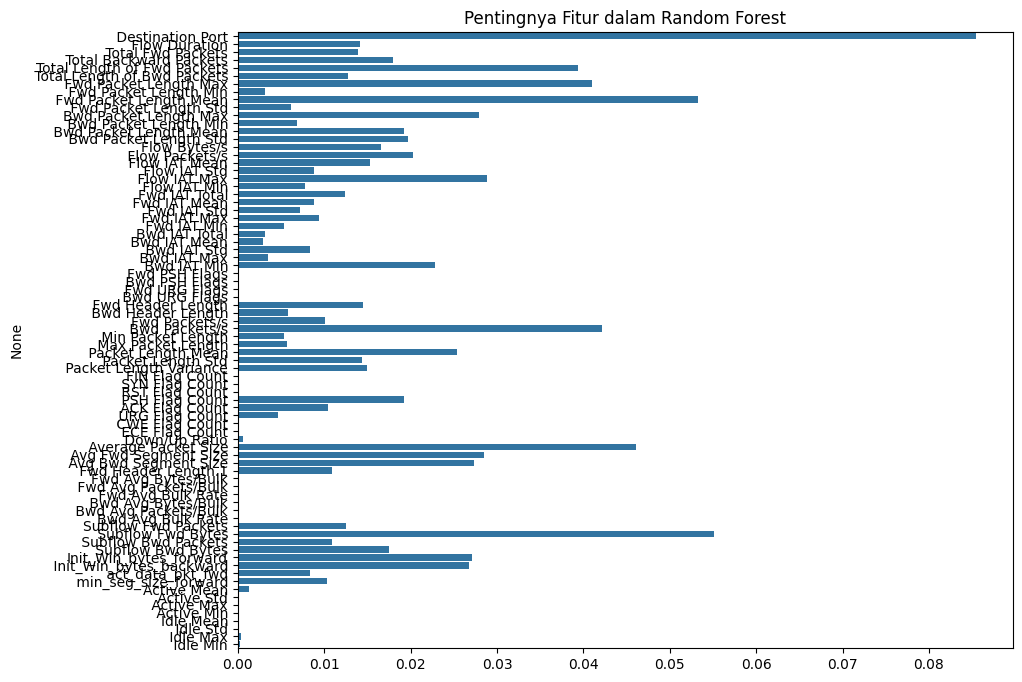

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data yang telah di-resample
model.fit(X_train_resampled, y_train_resampled)

# Menampilkan fitur penting (opsional)
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=features)
plt.title("Pentingnya Fitur dalam Random Forest")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Akurasi: 0.6420719331005926

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78     79084
           1       0.00      0.00      0.00       389
           2       0.00      0.00      0.00     25675
           3       0.00      0.00      0.00     18022

    accuracy                           0.64    123170
   macro avg       0.16      0.25      0.20    123170
weighted avg       0.41      0.64      0.50    123170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


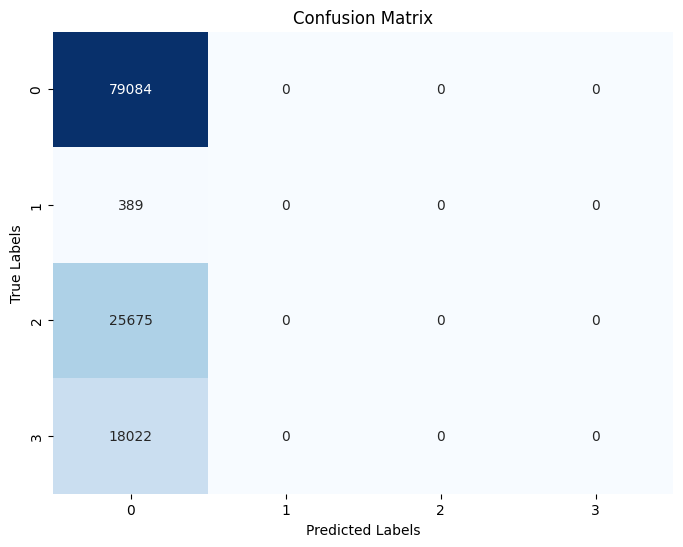

In [ ]:
import numpy as np

# Replace infinite values with NaN
X_test = np.where(np.isinf(X_test), np.nan, X_test)

# Replace NaN or infinite values with the column mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

# Scale the data to handle excessively large values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Retry prediction
try:
    y_pred = model.predict(X_test)
    print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
except ValueError as e:
    print(f"An error occurred: {e}")

In [ ]:
from sklearn.metrics import f1_score

# Menghitung F1-Score
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")


F1-Score: 0.5021173055398387


In [ ]:
from sklearn.metrics import roc_auc_score

# Menghitung probabilitas untuk setiap kelas
y_prob = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"ROC-AUC: {roc_auc}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ROC-AUC: 0.6092544644027538


**OPSIONAL**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Menyiapkan parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)


In [ ]:
import joblib

# Menyimpan model
joblib.dump(model, 'random_forest_model.pkl')

# Memuat model untuk prediksi di masa depan
loaded_model = joblib.load('random_forest_model.pkl')
